## Assignment_2

In [36]:
# Question 1a

import random

heads = 0
tails = 0
trials = 10000

for _ in range(trials):
    toss = random.choice(["Heads", "Tails"])
    if toss == "Heads":
        heads += 1
    else:
        tails += 1


p_heads = heads / trials
p_tails = tails / trials

print(f"Probability of Heads: {p_heads}")
print(f"Probability of Tails: {p_tails}")

Probability of Heads: 0.4977
Probability of Tails: 0.5023


First, I did 10,000 coin tosses. Because a coin has two sides, heads and tails, the probability for each of them is 0.5. I used Python to randomly pick either "Heads" or "Tails" for every toss, and after 10,000 tosses, I counted how many times every side landed. The end result was that both heads and tails landed close to 50% of the time, which is what we would expect in theory.

In [40]:
# Question 1b

sum = 0
trials = 10000

for _ in range(trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        sum += 1

print(f"Probability of getting a sum of 7: {sum / trials}")


Probability of getting a sum of 7: 0.1716


I first simulated a coin toss 10,000 times. As a coin has two sides, heads and tails, the chance for each is 0.5. I used Python to randomly select either "Heads" or "Tails" for every toss, and after 10,000 tosses, I counted how many times each side occurred. The ultimate outcome confirmed that heads and tails both appeared approximately 50% of the time, which is what we would see in theory.It estimates the probability that the sum of the two fair six-sided dice equals 7 when we roll them 10,000 times. The total of 7 is the most likely number when we roll two dice because it can be achieved through six different combinations (1+6, 2+5, 3+4, 4+3, 5+2, 6+1) out of a total of 36 possible results. We employ random.randint(1, 6) to mimic each roll of the die and see if the total of both dice is 7. Counting how many times this happens and dividing by the number of trials estimates the probability of rolling a sum of 7. 

In [44]:
# Question 2
def estimate_prob_at_least_one_six(trials=10000):
    count_with_six = 0

    for _ in range(trials):
        has_six = False
        for _ in range(10):
            if random.randint(1, 6) == 6:
                has_six = True
                break
        if has_six:
            count_with_six += 1

    return count_with_six / trials

prob = estimate_prob_at_least_one_six()
print(f"Estimated Probability of at least one 6 in 10 rolls: {prob}")


Estimated Probability of at least one 6 in 10 rolls: 0.8377


This section of the exercise is about approximating the probability of rolling at least one "6" in ten rolls of a fair six-sided die. We simulate by doing the experiment many times (10,000 trials), and in each trial, we roll the die 10 times with random.randint(1, 6). In each trial, we test whether at least one of the rolls was a "6". If so, we consider the trial to be successful. Then we divide the number of successful trials by the number of trials to estimate the probability.

In [48]:
# Question 3

import random

def simulate_bag_draws(trials=1000):
    red = 5
    green = 7
    blue = 8
    total_balls = red + green + blue
    
    count_red_given_blue = 0
    count_blue_previous = 0

    for _ in range(trials):
        previous_draw = random.choice(['red', 'green', 'blue'])  
        current_draw = random.choice(['red', 'green', 'blue']) 
        
        if previous_draw == 'blue' and current_draw == 'red':
            count_red_given_blue += 1
            

        if previous_draw == 'blue':
            count_blue_previous += 1
    

    prob_red_given_blue = count_red_given_blue / count_blue_previous if count_blue_previous != 0 else 0
    return prob_red_given_blue


prob_red_given_blue = simulate_bag_draws()
print(f"Estimated probability of drawing red given previous draw was blue: {prob_red_given_blue}")



Estimated probability of drawing red given previous draw was blue: 0.32926829268292684


we drawing colored balls from a bag containing 5 red, 7 green, and 8 blue balls with replacement. For over 1000 trials, we pick one ball randomly at a time and note its color. Because the draws are with replacement, every draw is independent, but we consider the results in order. In particular, we estimate the probability of drawing a red ball when the preceding ball drawn is blue. We do this by working through the list of draws and noting how frequently a red ball appears after a blue one, and dividing this by the number of times a blue ball has been drawn (excluding the last time). This simulation serves to reinforce the concept of conditional probability and can be likened to Bayes' Theorem in the case where prior and posterior probabilities are factored in.

In [52]:
# Question 4

import numpy as np

values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]

sample = np.random.choice(values, size=1000, p=probabilities)

mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print(f"Empirical Mean: {mean:.4f}")
print(f"Empirical Variance: {variance:.4f}")
print(f"Empirical Standard Deviation: {std_dev:.4f}")


Empirical Mean: 2.1560
Empirical Variance: 0.6237
Empirical Standard Deviation: 0.7897


we create a custom discrete random variable X with three values: 1, 2, and 3, with probabilities 0.25, 0.35, and 0.4, respectively. We create 1000 random samples with numpy.random.choice() with the given probabilities. We calculate the empirical (sample) mean, variance, and standard deviation with NumPy functions after the data is generated. This practice assists us in realizing how theoretical distributions are manifest in empirical values and how one can compute fundamental statistical properties based on observed values.

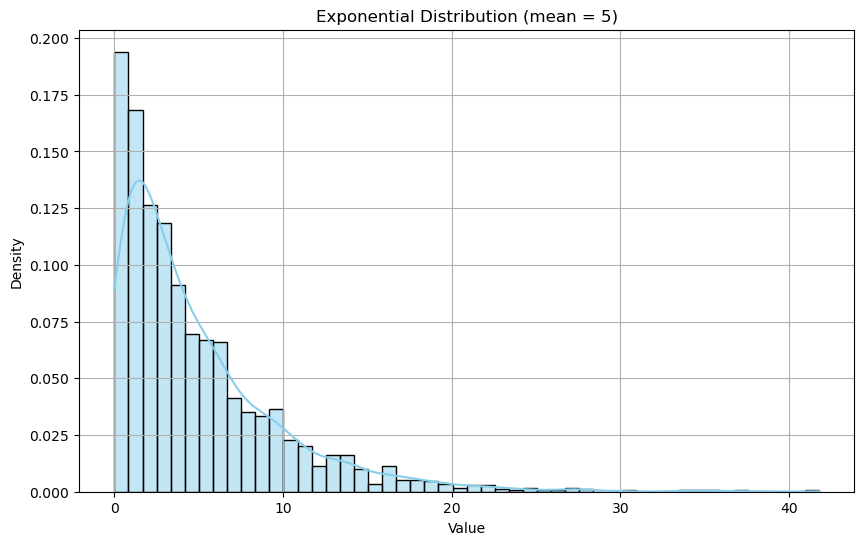

In [56]:
# Question 5

import matplotlib.pyplot as plt
import seaborn as sns

data = np.random.exponential(scale=5, size=2000)

plt.figure(figsize=(10, 6))
sns.histplot(data, bins=50, kde=True, stat="density", color='skyblue')
plt.title("Exponential Distribution (mean = 5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


We work with continuous probability distributions with the exponential distribution having a mean of 5. We employ numpy.random.exponential() to create 2000 random samples. The exponential distribution is commonly employed to describe waiting times between independent events. Once we have generated the data, we plot the distribution as a histogram with a probability density function (PDF) overlay. This plot illustrates why an exponential distribution typically has a right-skewed shape: there are lots of little values and not as many large ones, and it gets smaller exponentially.

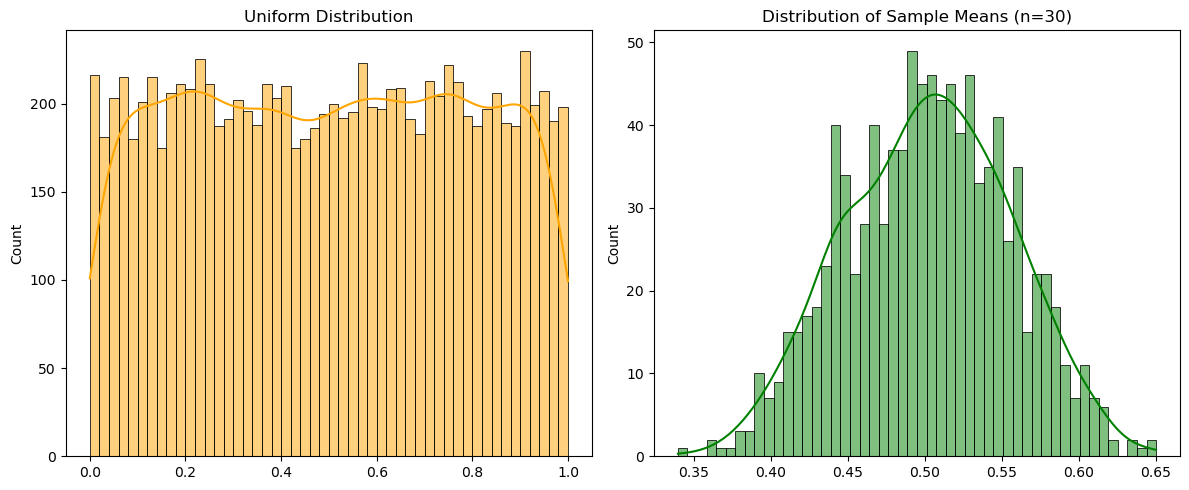

In [60]:
# Question 6

population = np.random.uniform(0, 1, 10000)

sample_means = [np.mean(np.random.choice(population, size=30)) for _ in range(1000)]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(population, bins=50, color='orange', kde=True)
plt.title("Uniform Distribution")

plt.subplot(1, 2, 2)
sns.histplot(sample_means, bins=50, color='green', kde=True)
plt.title("Distribution of Sample Means (n=30)")

plt.tight_layout()
plt.show()


I created 10,000 random numbers from a uniform distribution (all the values between 0 and 1 have an equal chance of occurring). I then drew 1000 samples of size 30 from this data, and computed the mean of each sample. I plotted the original uniform distribution, and then the distribution of the sample means. Although the original data was hardly at all bell-shaped, the distribution of the sample means ended up looking very nearly like a normal distribution. This illustrates how the CLT operates — regardless of what the original data looks like, the sample averages will be normally distributed if the sample size is sufficiently large.